# Artificial Neural Networks for Binary Classification Exercise

In this notebook we will build an ANN to predict whether customers will churn (indicated by the column `Churn`).


## Dataset
- **Source**: [Kaggle](https://www.kaggle.com/datasets/ahmedgaitani/customer-churn-prediction-dataset/data).
- **Variables of Interest**:
  - `Churn`
- As for the data card you should be able by now to figure the data out by your self :)

## Preprocessing Steps

1. **Dropping irrelevant columns**
2. **Encoding categorical variables**
3. **Data Splitting**

## Model Architecture

- **Input Layer**: Please specify here (the trainee should this this)
- **Hidden Layers**: Please specify here (the trainee should fill this)
- **Output Layer**: Please specify here (the trainee should fill this)

## Training

- **Optimizer**: Please specify here (the trainee should fill this)
- **Loss Function**: Please specify here (the trainee should fill this)
- **Metrics**: Please specify here (the trainee should fill this)
- **Epochs**: Please specify here (the trainee should fill this)
- **Batch Size**: Please specify here (the trainee should fill this)
- **Validation Split**: Please specify here (the trainee should fill this)

## Evaluation
- Please specify here (the trainee should fill this)

If you need to change the steps or add more please do so and explain why!

# Import libraries

In [662]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Load Data and EDA

In [663]:
df = pd.read_csv(r'/content/sample_data/Churn_Modelling_Exercise.csv')


In [664]:
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,Yes,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,No internet service,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,No,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

In [666]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,300.000000,300.000000,300.000000,300.000000
mean,0.543333,35.783333,67.226800,2477.975767
std,0.498951,21.113400,28.638073,1918.540111
min,0.000000,1.000000,18.450000,30.030000
25%,0.000000,17.000000,42.337500,910.302500
50%,1.000000,36.000000,68.635000,2072.400000
75%,1.000000,53.250000,92.430000,3618.405000
max,1.000000,72.000000,118.640000,8318.880000


In [667]:
df.duplicated().sum()

0

In [668]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Preprocessing

### Drop unnecessary columns

In [669]:
df.drop(['customerID'], axis=1, inplace=True)

### One-hot-encoder and Label-encoder

In [670]:
# encoding_columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','PaymentMethod']

# # Initialize OneHotEncoder
# ohe_encoder = OneHotEncoder(sparse_output=False)

# # Apply one-hot encoding to the categorical columns
# one_hot_encoded = ohe_encoder.fit_transform(df[encoding_columns])

# # Create a DataFrame with the one-hot encoded columns
# # We use get_feature_names_out() to get the column names for the encoded data
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_encoder.get_feature_names_out(encoding_columns))

# # Concatenate the one-hot encoded dataframe with the original dataframe
# df_encoded = pd.concat([df, one_hot_df], axis=1)

# # Drop the original categorical columns
# df_encoded = df_encoded.drop(encoding_columns, axis=1)

# df = df_encoded

In [671]:
df_categorical = df.select_dtypes(include='object')

categorical_features = df_categorical.columns.tolist()

label_encoder = LabelEncoder()

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

## Selecting Features && Train Test Split

In [672]:
scaler = StandardScaler()

df[['TotalCharges','MonthlyCharges','tenure']]= scaler.fit_transform(df[['TotalCharges','MonthlyCharges','tenure']])

### Selecting Features

In [673]:
# Selecting the features and the target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [674]:
X.shape

(300, 19)

### Train Test Split

In [675]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

### Creating the sequential model

In [676]:
# Define the model
model = Sequential()

### Adding the input layer

In [677]:
model.add(Dense(units=8, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding the hidden layers

In [678]:
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))

### Adding the output layer

In [679]:
model.add(Dense(units=1, activation='sigmoid'))

### Compiling the model

In [680]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

### Display model summary

In [681]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)                    │ (None, 8)                   │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 313 (1.22 KB)

 Trainable params: 313 (1.22 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting the model

In [682]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5580 - loss: 0.6938 - val_accuracy: 0.4792 - val_loss: 0.6926
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6495 - loss: 0.6886 - val_accuracy: 0.5208 - val_loss: 0.6926
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6085 - loss: 0.6850 - val_accuracy: 0.4375 - val_loss: 0.6927
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6882 - loss: 0.6720 - val_accuracy: 0.4792 - val_loss: 0.6909
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7213 - loss: 0.6613 - val_accuracy: 0.4792 - val_loss: 0.6906
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7043 - loss: 0.6545 - val_accuracy: 0.4792 - val_loss: 0.6885
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6449 - loss: 0.6510 - val_accuracy: 0.4792 - val_loss: 0.7006
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6983 - loss: 0.6384 - val_accuracy: 0.4792 - 

## Evaluating the model

In [683]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4354 - loss: 0.7627  


[0.7619828581809998, 0.44999998807907104]

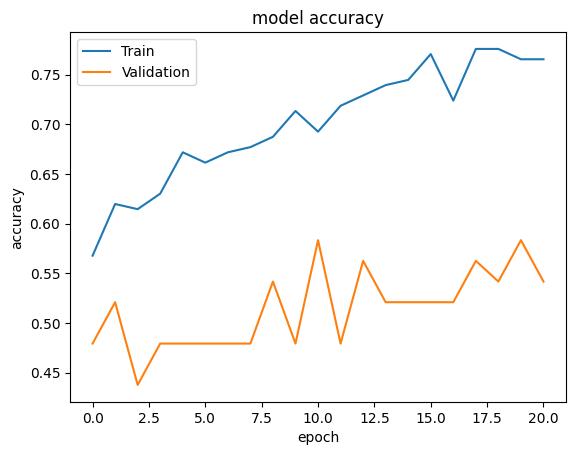

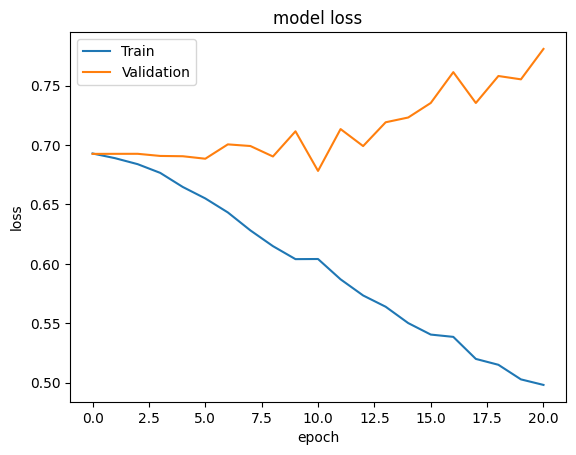

In [684]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()